Missing values per column:
Township        0
Area            0
State           0
Tenure          0
Type            0
Median_Price    0
Median_PSF      0
Transactions    0
dtype: int64

--- Model Evaluation ---
MAE: 134474.24
RMSE: 363152.70
R²: 0.250


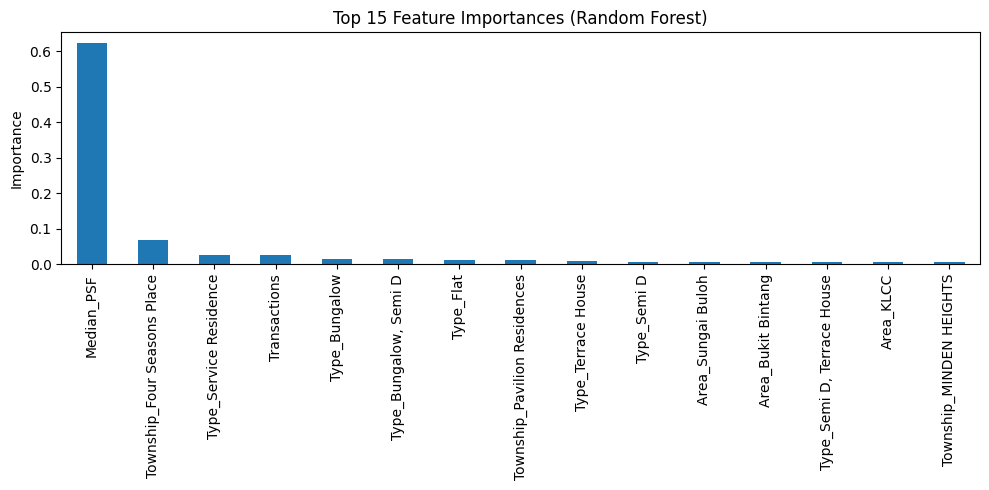

In [5]:
# --- Step 1: Import Libraries ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- Step 2: Load the dataset ---
df = pd.read_csv("malaysia_house_price_data_2025.csv")

# --- Step 3: Handle missing values ---
print("Missing values per column:")
print(df.isnull().sum())
df = df.dropna()  # drop rows with missing values

# --- Step 4: One-hot encode categorical columns ---
df_encoded = pd.get_dummies(df, drop_first=True)

# --- Step 5: Define features (X) and target (y) ---
X = df_encoded.drop(columns='Median_Price')
y = df_encoded['Median_Price']

# --- Step 6: Split into training and test sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 7: Standardize numeric features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Step 8: Train Random Forest model ---
model = RandomForestRegressor(
    n_estimators=300,       # number of trees
    max_depth=None,         # let trees grow fully
    random_state=42,
    n_jobs=-1
)
model.fit(X_train_scaled, y_train)

# --- Step 9: Make predictions ---
y_pred = model.predict(X_test_scaled)

# --- Step 10: Evaluate model performance ---
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

# --- Step 11: Feature Importance Plot ---
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 5))
top_features.plot(kind='bar')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
